In [1]:
from mk_plots import get_partial_data2frame

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from matplotlib.ticker import  FormatStrFormatter

In [5]:
plt.rcParams['font.sans-serif']= 'Times New Roman'

In [6]:
import numpy as np

In [7]:
def partial_plot():
    import matplotlib.ticker as tck
    
    df, _ = get_partial_data2frame()
    # colors = ['#F65429', '#EED364', '#3382A3']
    # sns.set_palette(sns.color_palette(colors))
    plt.figure(figsize=(8/2.54, 8/2.54), facecolor='w')
    p1 = sns.lineplot(x='percent', y='val acc', hue='models', data=df, marker='*', ms=6, lw=0.5, legend=True)
    sns.lineplot(x='percent', y='test acc', hue='models', data=df, marker='o',ms=4, lw=0.5, alpha=0.7, legend=False)
    handles, _ = p1.get_legend_handles_labels()
    l1 = plt.legend(handles=handles, labels=['EfficientNet-B0', 'MobileNetV3-small', 'ResNet-34'], frameon=False,
                    bbox_to_anchor=[0.45, 0.5],fontsize=7)
    custom_scatter = [plt.scatter(0, 0, marker='*', s=4, label='Validation Accuracy', color='k'),
                      plt.scatter(0, 0, marker='o', s=4, label='Test Accuracy', color='k')]
    l2 = plt.legend(handles=custom_scatter, frameon=False, bbox_to_anchor=[0.45, 0.32],fontsize=7)

    p1.add_artist(l1)
    p1.add_artist(l2)
    ax = plt.gca()
    plt.xlim(0,10.2)
    plt.xticks(ticks=np.arange(1, 11, 1), labels=['{}%'.format(i) for i in range(10, 101, 10)],fontsize=7)
#     plt.yticks(ticks=np.arange(0.7,1.1,0.1), labels=[])
    ax.yaxis.set_ticks(np.arange(0.7,0.96,0.04))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.tick_params(axis='x',which='minor',bottom=False)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(True, alpha=0.3,ls='--',lw=0.5)
    
    plt.xlabel('Percentage of laboratory images added into field datasets',fontsize=7)
    plt.ylabel('Accuracy',fontsize=7)
    plt.tight_layout()
    plt.savefig('../fig/lab_add2field_val_test_acc_modified.png', dpi=300)
    # plt.show()

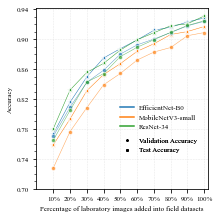

In [8]:
partial_plot()

In [18]:
import glob

In [24]:
import numpy as np

In [19]:
import pandas as pd

In [20]:
from sklearn.metrics import accuracy_score

In [29]:
def cross_test_plot():
    predict_path = sorted(glob.glob('../data/cross_tested/*csv'))
    models = [path.split('/')[-1].split('_')[0] for path in predict_path]
    sources = [path.split('/')[-1].split('_')[1] for path in predict_path]
    targets = [path.split('/')[-1].split('_')[2][:-4] for path in predict_path]
    f = lambda x: x.split('/')[-2]
    accs = []
    for fn in predict_path:
        df = pd.read_csv(fn, index_col=0)
        df['true_label'] = df['img'].apply(f)
        acc = accuracy_score(df['true_label'], df['cla'])
        accs.append(acc)
    result = pd.DataFrame({'models': models, 'sources': sources, 'targets': targets, 'acc': accs})
    field = result[result['sources'] == 'field']
    lab = result[result['sources'] == 'lab']
    mixed = result[result['sources'] == 'mixed']
    
#     print(lab)
#     print()
    
    from matplotlib.pyplot import bar
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.grid'] = False
    plt.rcParams['axes.titlesize'] = 8
    
    colors = {'lab': '#AE3D3A', 'mixed': '#3382A3', 'field': '#304E6C'}
    models_labels = ['EfficientNet-B0', 'MobileNetV3-small', 'ResNet-34']

    fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8/2.54,7*0.75), facecolor='w')
    # lab on field
    for i in range(3):
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    b1 = axs[0].bar(x=np.arange(3) - 0.1, height=lab['acc'].values[0::2], width=0.2, color=colors['field'],
                    label='Test on Field')
    b2 = axs[0].bar(x=np.arange(3) + 0.1, height=lab['acc'].values[1::2], width=0.2, color=colors['mixed'],
                    label='Test on Mixed')
    axs[0].set_ylim(0, 1)
    axs[0].set_ylabel('Accuracy', fontsize=8)
    axs[0].set_title('Train on Lab')
    axs[0].set_xticks([0, 1.05, 2], labels=models_labels, fontsize=8)
    axs[0].xaxis.set_ticks_position('none')
    

    b3 = axs[1].bar(x=np.arange(3) - 0.1, height=mixed['acc'].values[0::2], width=0.2, color=colors['field'],
                    label='Test on Field')
    b4 = axs[1].bar(x=np.arange(3) + 0.1, height=mixed['acc'].values[1::2], width=0.2, color=colors['lab'],
                    label='Test on Lab')
    axs[1].set_ylim(0, 1)
    axs[1].set_title('Train on Mixed')
    axs[1].set_ylabel('Accuracy', fontsize=8)
    axs[1].set_xticks([0, 1.05, 2], labels=models_labels, fontsize=8)
    axs[1].xaxis.set_ticks_position('none')
    b5 = axs[2].bar(x=np.arange(3) - 0.1, height=field['acc'].values[0::2], width=0.2, color=colors['lab'],
                    label='Test on '
                          'Lab')
    b6 = axs[2].bar(x=np.arange(3) + 0.1, height=field['acc'].values[1::2], width=0.2, color=colors['mixed'],
                    label='Test '
                          'on '
                          'Mixed')
    axs[2].set_ylim(0, 1)
    axs[2].set_title('Train on Field')
    axs[2].set_ylabel('Accuracy', fontsize=8)
    axs[2].set_xticks([0, 1.05, 2], labels=models_labels, fontsize=8)
    axs[2].xaxis.set_ticks_position('none')

    legends = [bar([0], [0], color=colors['field'], label='Test on Field'),
               bar([0], [0], color=colors['mixed'], label='Test on Mixed'),
               bar([0], [0], color=colors['lab'], label='Test on Lab')]
    axs[2].legend(handles=legends, bbox_to_anchor=[0.7,0.95], frameon=False, fontsize=7)

    axs[0].bar_label(b1, label_type='edge', fmt="%.3f", fontsize=7)
    axs[0].bar_label(b2, label_type='edge', fmt="%.3f", fontsize=7)
    axs[1].bar_label(b3, label_type='edge', fmt="%.3f", fontsize=7)
    axs[1].bar_label(b4, label_type='edge', fmt="%.3f", fontsize=7)
    axs[2].bar_label(b5, label_type='edge', fmt="%.3f", fontsize=7)
    axs[2].bar_label(b6, label_type='edge', fmt="%.3f", fontsize=7)

    plt.yticks(fontsize=8)
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
#     plt.savefig('../fig/cross_test_row_modified.png', dpi=300)
    plt.savefig('../fig/cross_test_row.tiff', dpi=300)
#     plt.show()

In [30]:
%matplotlib inline

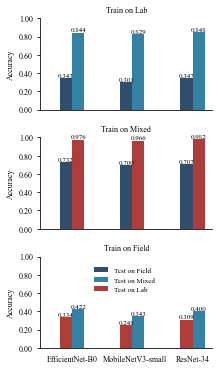

In [31]:
cross_test_plot()

In [5]:
import matplotlib.pyplot as plt

In [7]:
from mk_plots import get_diseases2frame,get_diseases_individual2frame

In [8]:
def diseases_acc_plot():
    total = get_diseases2frame(criterion='../data/*/output/*test.csv')
    limit_df = get_diseases_individual2frame()
    diseases = total.diseases.unique().tolist()
    diseases = [dis.replace('_', ' ').title() for dis in diseases]
    

    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['xtick.minor.visible']=False
    plt.rcParams['ytick.minor.visible']=False
    
    fig, axs = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(16/2.54, 8/2.54), facecolor='w')
    i = 0
    
    for md in ['EfficientNet', 'MobileNetV3', 'ResNet']:
        tdf = total[total['model'] == md]
        ldf = limit_df[limit_df['model'] == md]
        tdata = tdf.accuracy.values.reshape(3, -1).T
        tdata = tdata[:,[0,2,1]]
        ldata = ldf.accuracy.values.reshape(3, -1).T
        ldata = ldata[:,[0,2,1]]
        delta = ldata-tdata
        p1 = axs[i].imshow(tdata, cmap='coolwarm_r')
        p2 = axs[i + 1].imshow(ldata, cmap='coolwarm_r')
        axs[i].set_xticks([0, 1, 2], ['Field', 'Mixed', 'Lab'], rotation=60)
        axs[i + 1].set_xticks([0, 1, 2], ['Field', 'Mixed', 'Lab'], rotation=60)
        axs[i].set_yticks(range(0, 14, 1), diseases)
        axs[i + 1].set_yticks(range(0, 14, 1), diseases)
        axs[i].set_title('(a)')
        axs[i + 1].set_title('(b)')
        for x in range(delta.shape[1]):
            for y in range(delta.shape[0]):
#                 value = delta.T[x,y]
#                 if value > 0:
#                     c = 'r'
#                 else:
#                     c = 'k'
                axs[i].text(x, y, '%.2f'%tdata.T[x,y],color='k', horizontalalignment='center',
                              verticalalignment='center',fontsize=5)
                axs[i+1].text(x, y, '%.2f'%ldata.T[x,y],color='k', horizontalalignment='center',
                              verticalalignment='center',fontsize=5)
        i += 2

    plt.tight_layout()
    
    fig.text(0.27, 0.01, 'EfficientNet-B0', fontsize=8)
    fig.text(0.47, 0.01, 'MobileNetV3-small', fontsize=8)
    fig.text(0.69, 0.01, 'ResNet-34', fontsize=8)
    cbar = fig.colorbar(p2, ax=axs, shrink=1)
    cbar.ax.set_ylabel('Accuracy', fontsize=8, rotation=270, labelpad=15)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    
    plt.savefig('../fig/diseases_acc_change_modified.png', dpi=300)
    plt.show()

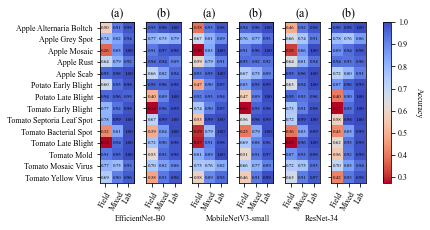

In [9]:
diseases_acc_plot()

In [10]:
import pandas as pd

In [11]:
def precision_recall_f1score_heatmap(columns):
    total_df = pd.read_csv('../data/tables/heatmap_total.csv', index_col=0)
    individual_df = pd.read_csv('../data/tables/heatmap_individual.csv', index_col=0)

    diseases = total_df.diseases.unique().tolist()
    diseases = [dis.replace('_', ' ').title() for dis in diseases]

    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['xtick.minor.visible']=False
    plt.rcParams['ytick.minor.visible']=False
    
    
    fig, axs = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(16/2.54, 8/2.54), facecolor='w')
    i = 0
    for md in ['EfficientNet', 'MobileNetV3', 'ResNet']:
        tdf = total_df[total_df['model'] == md]
        ldf = individual_df[individual_df['model'] == md]
        
        ldf = ldf.sort_values(by=['cond','diseases'])
        
        tdata = tdf[columns].values.reshape(3, -1).T
        ldata = ldf[columns].values.reshape(3, -1).T
        
        ldata = ldata[:,[0,2,1]]
        
        delta = ldata-tdata
        
        p1 = axs[i].imshow(tdata, cmap='coolwarm_r')
        p2 = axs[i + 1].imshow(ldata, cmap='coolwarm_r')
        axs[i].set_xticks([0, 1, 2], ['Field', 'Mixed', 'Lab'], rotation=60)
        axs[i + 1].set_xticks([0, 1, 2], ['Field', 'Mixed', 'Lab'], rotation=60)
        axs[i].set_yticks(range(0, 14, 1), diseases)
        axs[i + 1].set_yticks(range(0, 14, 1), diseases)
        axs[i].set_title('(a)')
        axs[i + 1].set_title('(b)')
        for x in range(delta.shape[1]):
            for y in range(delta.shape[0]):
#                 value = delta.T[x,y]
#                 if value > 0:
#                     c = 'r'
#                 else:
#                     c = 'k'
                axs[i].text(x, y, '%.2f'%tdata.T[x,y],color='k', horizontalalignment='center',
                              verticalalignment='center',fontsize=5)
                axs[i+1].text(x, y, '%.2f'%ldata.T[x,y],color='k', horizontalalignment='center',
                              verticalalignment='center',fontsize=5)
        i += 2

    plt.tight_layout()
    
    fig.text(0.27, 0.01, 'EfficientNet-B0', fontsize=8)
    fig.text(0.47, 0.01, 'MobileNetV3-small', fontsize=8)
    fig.text(0.69, 0.01, 'ResNet-34', fontsize=8)
    cbar = fig.colorbar(p2, ax=axs, shrink=1)
    cbar.ax.set_ylim(0.3,1.0)
    cbar.ax.set_ylabel(columns.replace('-',' ').capitalize(), fontsize=8, rotation=270, labelpad=15)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    plt.savefig('../fig/heatmap_'+columns+'_modified.png', dpi=300)
    plt.show()

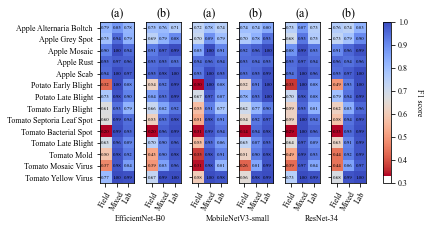

In [12]:
precision_recall_f1score_heatmap(columns='f1-score')

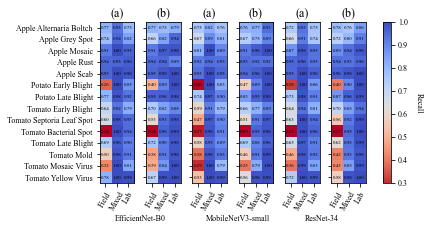

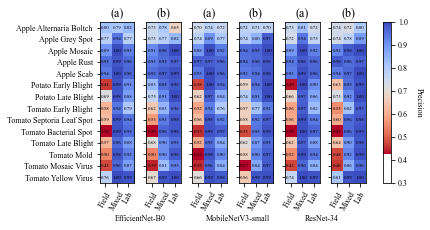

In [13]:
precision_recall_f1score_heatmap(columns='recall')
precision_recall_f1score_heatmap(columns='precision')

In [177]:
import os
from PIL import Image

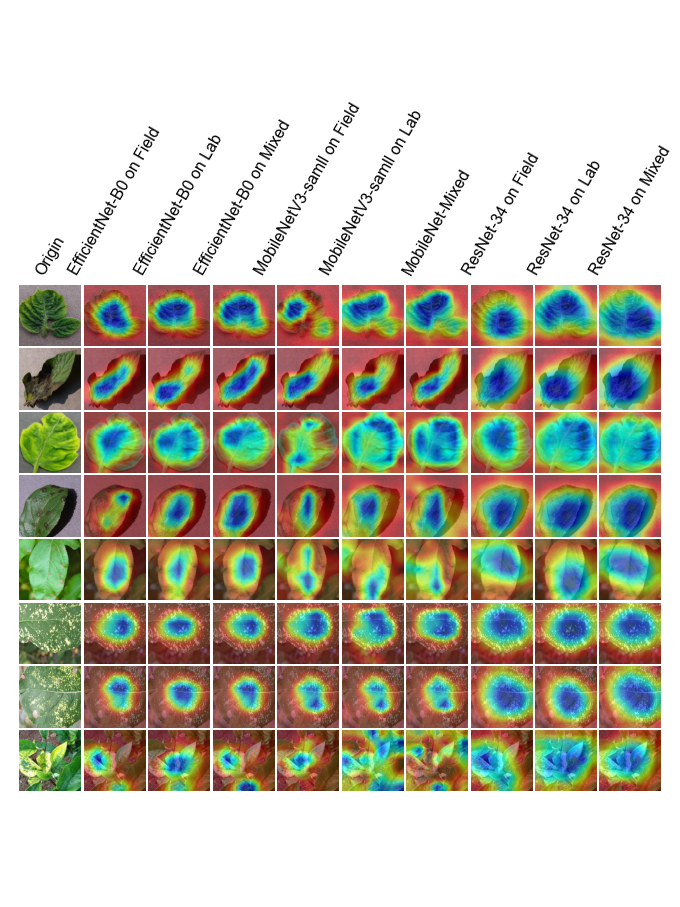

In [194]:
### def cam_plot():
origin = sorted(glob.glob('../data/cam_maps/origin_test/*/*'))
model_folders = sorted(glob.glob('../data/cam_maps/[!c]*[!t]'))
images_list = {}
for fld in model_folders:
    criterion = os.path.join(fld, '*', '*')
    images = sorted(glob.glob(criterion))
    images_list[fld] = images

select = [4216, 2798, 3813, 810, 98, 265, 256, 307]
titles = ['EfficientNet-B0 on Field', 'EfficientNet-B0 on Lab', 'EfficientNet-B0 on Mixed',
          'MobileNetV3-samll on Field', 'MobileNetV3-samll on Lab','MobileNet-Mixed', 
          'ResNet-34 on Field', 'ResNet-34 on Lab', 'ResNet-34 on Mixed']

fig, axs = plt.subplots(ncols=10, nrows=8, figsize=(12/2.54,16/2.54 ),facecolor='w')
for i, idx in enumerate(select):
    img1_path = origin[idx]
    img1 = Image.open(img1_path)
    w, h = img1.size
    left = (w - 224) / 2
    top = (h - 224) / 2
    right = (w + 224) / 2
    bottom = (h + 224) / 2
    img_resize = img1.crop((left, top, right, bottom))
    axs[i, 0].imshow(img_resize)
    axs[i, 0].axis('off')
    j = 1
    for key, values in images_list.items():
        img2_path = values[idx]
        img2 = plt.imread(img2_path)
        axs[i, j].imshow(img2)
        axs[i, j].axis('off')
        if i == 0:
            axs[i, 0].set_title('Origin', fontsize=8, rotation=60)
            axs[i, j].set_title(titles[j - 1], fontsize=8, rotation=60)
        j += 1
        
        
plt.tight_layout()
plt.subplots_adjust(hspace=-0.75,wspace=0.05)
plt.savefig('../fig/cam_plot1_modified.png', dpi=300)
plt.show()